In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import re
import shutil
import time
from datetime import datetime
from datetime import timedelta
pd.set_option('display.max_columns',None)
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


In [19]:
'''loading data'''
path=os.getcwd()
df=pd.read_excel(path+'\\datasource.xlsx',sheet_name='柱状图',parse_dates=True)
display('df')

,时间,应收账款,应收账款1,应收账款2
0,年1,3.00,2.00,1
1,年2,5.00,4.00,3
2,年3,6.00,5.00,4
3,年4,2.00,1.00,0
4,年5,1.20,0.20,0
5,年6,1.55,0.55,0


In [37]:
for t1,t2 in zip(df['时间'],df.sum(axis=1)): 
    print(t1,t2)

年1 6.0
年2 12.0
年3 15.0
年4 3.0
年5 1.4
年6 2.1


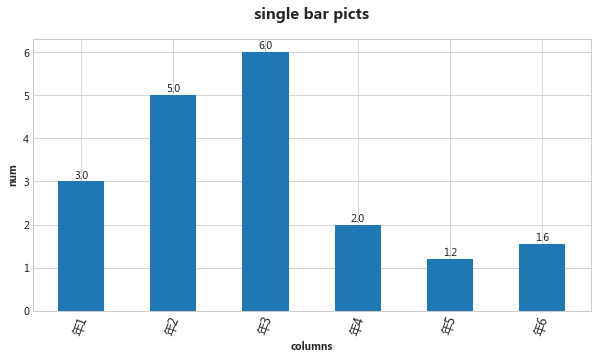

In [31]:
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid') # 显示白底背景
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 识别汉化文字
plt.rcParams['axes.unicode_minus']=False # 识别汉化文字

'''plot single bar picts'''
plt.figure(figsize=(10,5))
plt.bar(df['时间'],df['应收账款'],align='center',alpha=1, width=0.5)
plt.xticks(rotation=70,fontsize=12) # x轴旋转90度
plt.xlabel('columns',fontweight='bold')
plt.ylabel('num',fontweight='bold')
#柱形图添加文字
for a,b in zip(df['时间'],df['应收账款']): 
    plt.text(a, b ,'%.1f'%b,ha='center',va='bottom',fontsize=10)
#对整体图像设置标题b
plt.title('single bar picts',fontsize=15,fontweight='bold',pad=20)
#保存图片 
plt.savefig('柱状单图样例.png',bbox_inches='tight')

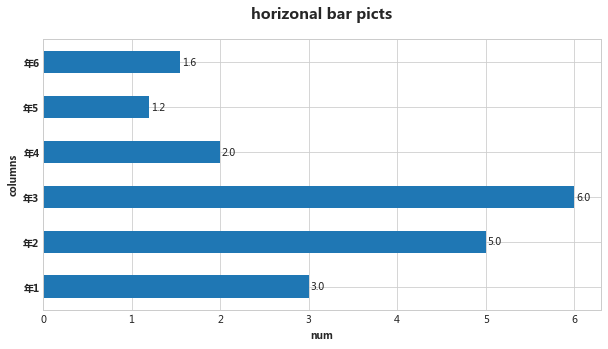

In [77]:
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid') # 显示白底背景
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 识别汉化文字
plt.rcParams['axes.unicode_minus']=False # 识别汉化文字

'''horizonal bar picts'''
plt.figure(figsize=(10,5))
plt.barh(df.index,df['应收账款'],align='center',alpha=1, height=0.5)
plt.xlabel('num',fontweight='bold')
plt.ylabel('columns',fontweight='bold')
#柱形图添加文字
for a,b in zip(df['应收账款'],df.index): 
    plt.text(a+0.1, b ,'%.1f'%a,ha='center',va='center',fontsize=10)
#更换y轴坐标   
plt.yticks(df.index,df['时间'],fontsize=10,fontweight='bold')
#对整体图像设置标题b
plt.title('horizonal bar picts',fontsize=15,fontweight='bold',pad=20)
#保存图片 
plt.savefig('横向柱状单图样例.png',bbox_inches='tight')

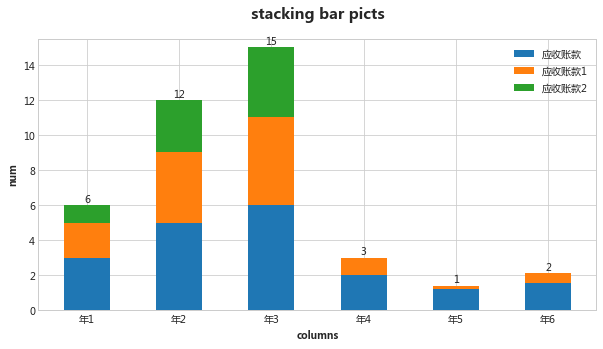

In [39]:
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid') # 显示白底背景
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 识别汉化文字
plt.rcParams['axes.unicode_minus']=False # 识别汉化文字

'''plot stacking bar picts'''
fig=plt.figure(figsize=(10,5))
#设置堆叠
a=df['应收账款']
b=df['应收账款1']
c=df['应收账款2']
plt.bar(df['时间'],a,align='center', width=0.5,label='应收账款')
plt.bar(df['时间'],b,bottom=a, width=0.5,label='应收账款1')
plt.bar(df['时间'],c,bottom=a+b, width=0.5,label='应收账款2')
plt.ylim(0,df.sum(axis=1).max()+0.5)
plt.xlabel('columns',fontweight='bold')
plt.ylabel('num',fontweight='bold')
#设置图例
plt.legend(fontsize=10,bbox_to_anchor=(1, 1))
# 添加上标
for t1,t2 in zip(df['时间'],df.sum(axis=1)): 
    plt.text(t1, t2 ,'%.0f'%t2,ha='center',va='bottom',fontsize=10)
#添加标题
plt.title('stacking bar picts',fontsize=15,fontweight='bold',pad=20) 
#保存图片 
plt.savefig('堆积图样例.png',bbox_inches='tight')

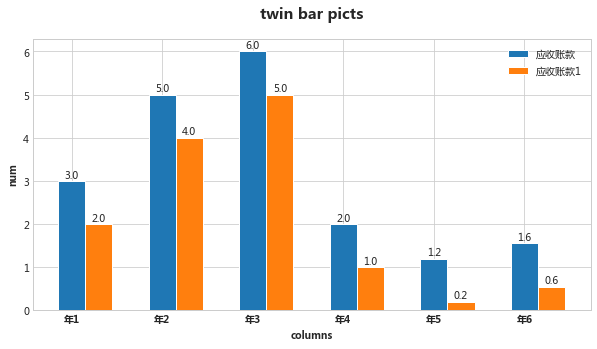

In [51]:
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid') # 显示白底背景
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 识别汉化文字
plt.rcParams['axes.unicode_minus']=False # 识别汉化文字

'''plot twin bar picts'''
fig=plt.figure(figsize=(10,5))
#twin bar-first bar
plt.bar(df.index,df['应收账款'], width=0.3, label='应收账款', edgecolor='white')
for a, b in zip(df.index,df['应收账款']):
    plt.text(a, b, '{}'.format(round(b, 1)), ha='center', va='bottom', fontsize=10)
#twin bar-second bar
plt.bar(df.index+0.3,df['应收账款1'], width=0.3,label='应收账款1', edgecolor='white')
for c, d in zip(df.index+0.3,df['应收账款1']):
    plt.text(c, d, '{}'.format(round(d, 1)), ha='center', va='bottom', fontsize=10)
# 设定x轴以及y轴图标
plt.xlabel('columns',fontweight='bold')
plt.ylabel('num',fontweight='bold')
# 替换横坐标名称
plt.xticks(df.index,df['时间'],fontsize=10,fontweight='bold')
#设置图例
plt.legend(fontsize=10,bbox_to_anchor=(1, 1))
#添加标题
plt.title('twin bar picts',fontsize=15,fontweight='bold',pad=20) 
#保存图片 
plt.savefig('双子柱状图样例.png',bbox_inches='tight')

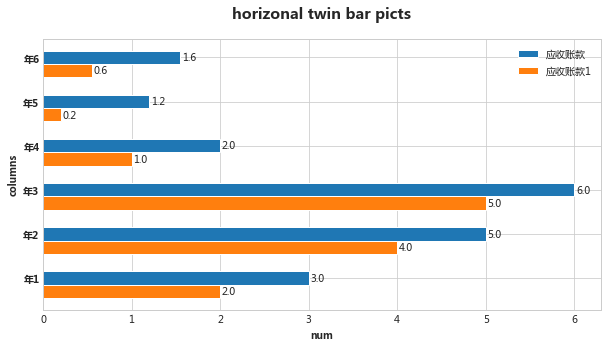

In [70]:
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid') # 显示白底背景
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 识别汉化文字
plt.rcParams['axes.unicode_minus']=False # 识别汉化文字

'''plot horizonal twin bar picts'''
fig=plt.figure(figsize=(10,5))
#twin bar-first bar
plt.barh(df.index,df['应收账款'], height=0.3, label='应收账款', edgecolor='white')
for a, b in zip(df['应收账款'],df.index):
    plt.text(a+0.1, b, '{}'.format(round(a, 1)),ha='center', va='center', fontsize=10)
#twin bar-second bar
plt.barh(df.index-0.3,df['应收账款1'], height=0.3, label='应收账款1', edgecolor='white')
for a, b in zip(df['应收账款1'],df.index-0.3):
    plt.text(a+0.1, b, '{}'.format(round(a, 1)),ha='center', va='center', fontsize=10)
# 设定x轴以及y轴图标
plt.xlabel('num',fontweight='bold')
plt.ylabel('columns',fontweight='bold')
# 替换横坐标名称
plt.yticks(df.index,df['时间'],fontsize=10,fontweight='bold')
#设置图例
plt.legend(fontsize=10,bbox_to_anchor=(1, 1))
#添加标题
plt.title('horizonal twin bar picts',fontsize=15,fontweight='bold',pad=20) 
#保存图片 
plt.savefig('横向双子柱状图样例.png',bbox_inches='tight')